In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

**Original Data Source - Life Expectancy:** https://apps.who.int/gho/athena/api/GHO/life_expectancy?target=GHO/WHOSIS_000001&profile=text&format=csv   
**Original Data Source - GDP per Capita:** https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=csv

In [2]:
life_expectancy = pd.read_csv('life_expectancy.csv')
life_expectancy.head(15)

##### What does each column represent?
* **Indicator:**  (UNNECESARY)  
* **PUBLISH STATES:**  (UNNECESARY)  
* **Year:**  
* **WHO region:**  
* **World Bank income group:**  
* **Country:**  
* **Sex:**  
* **Display Value:**  
* **Numeric:**  (UNNECESARY)   

Lets drop the unnecesary columns in order to simplify further work.

In [4]:
life_expectancy.drop(['Indicator','PUBLISH STATES','Numeric'], axis=1, inplace=True)
life_expectancy.head(15)

,Year,WHO region,World Bank income group,Country,Sex,Display Value
0,2010,Eastern Mediterranean,NaN,Afghanistan,Male,59.6
1,2010,Eastern Mediterranean,NaN,Afghanistan,Female,60.3
2,2010,Eastern Mediterranean,NaN,Afghanistan,Both sexes,59.9
3,2010,Africa,NaN,Angola,Male,55.8
4,2010,Africa,NaN,Angola,Female,60.5
5,2010,Africa,NaN,Angola,Both sexes,58.1
6,2015,Africa,NaN,Angola,Both sexes,61.7
7,2015,Europe,NaN,Albania,Male,76.1
8,2015,Europe,NaN,Albania,Female,79.7
9,2015,Europe,NaN,Albania,Both sexes,77.8


Much better.

### Let's tidy things up a little more.  
We'll drop duplicate columns (in case there is any).  
We'll lowercase the column headers.  
We'll display an statistical summary of table values.

In [5]:
life_expectancy.drop_duplicates()
life_expectancy.columns = map(str.lower, life_expectancy.columns)
life_expectancy.columns = life_expectancy.columns.str.replace(' ','_')
life_expectancy.info()
life_expectancy.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     2328 non-null   int64  
 1   who_region               2280 non-null   object 
 2   world_bank_income_group  60 non-null     object 
 3   country                  2196 non-null   object 
 4   sex                      2328 non-null   object 
 5   display_value            2328 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 109.2+ KB


,year,who_region,world_bank_income_group,country,sex,display_value
count,2328.000000,2280,60,2196,2328,2328.000000
unique,NaN,7,5,183,3,NaN
top,NaN,Europe,Low-income,Afghanistan,Male,NaN
freq,NaN,612,12,12,776,NaN
mean,2011.000000,NaN,NaN,NaN,NaN,70.233033
std,7.107862,NaN,NaN,NaN,NaN,8.831624
min,2000.000000,NaN,NaN,NaN,NaN,28.000000
25%,2007.500000,NaN,NaN,NaN,NaN,64.400000
50%,2012.500000,NaN,NaN,NaN,NaN,71.800000
75%,2016.000000,NaN,NaN,NaN,NaN,77.000000


In [6]:
print(life_expectancy['who_region'].unique())
print(life_expectancy['world_bank_income_group'].unique())
print(life_expectancy['sex'].unique())

['Eastern Mediterranean' 'Africa' 'Europe' 'Americas' 'Western Pacific'
 'South-East Asia' nan 'Global']
[nan 'Low-income' 'Lower-middle-income' 'Upper-middle-income'
 'High-income' 'Global']
['Male' 'Female' 'Both sexes']


## Structurally Missing Data
This dataset contains 2328 measurements of average life expectancy (at birth) from 7 WHO regions ('Eastern Mediterranean', 'Africa', 'Europe', 'Americas', 'Western Pacific',
 'South-East Asia' and 'Global'), 5 World Bank income groups ('Low-income', 'Lower-middle-income', 'Upper-middle-income', 'High-income' and 'Global'), 183 countries and 3 sex divisions ('Male', 'Female' and 'Both sexes').  
Although it seems there are missing values for 'WHO region', 'World Bank income group' and 'Country' that's only because there are certain rows dedicated exclusively to contain the average life expectancy for a whole 'WHO region' or 'World Bank income group', thus they do not display any value in the 'Country' feature. Alternatively, rows for global life expectancy (12 in total, for each combination of year and sex) contain the value 'global' both in the cells for 'WHO region' or 'World Bank income group'. Thus the irregular number on null values in some columns.
#### **Recapitulating**: we are good to go with the statistical analyses.

In [7]:
life_expectancy_2000 = life_expectancy[life_expectancy.year == 2000]
life_expectancy_2000.drop(['year'], axis=1, inplace=True)

life_expectancy_2010 = life_expectancy[life_expectancy.year == 2010]
life_expectancy_2010.drop(['year'], axis=1, inplace=True)

life_expectancy_2015 = life_expectancy[life_expectancy.year == 2015]
life_expectancy_2015.drop(['year'], axis=1, inplace=True)

life_expectancy_2019 = life_expectancy[life_expectancy.year == 2019]
life_expectancy_2019.drop(['year'], axis=1, inplace=True)

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Life expectancy distribution across WHO regions for years 2000 and 2019

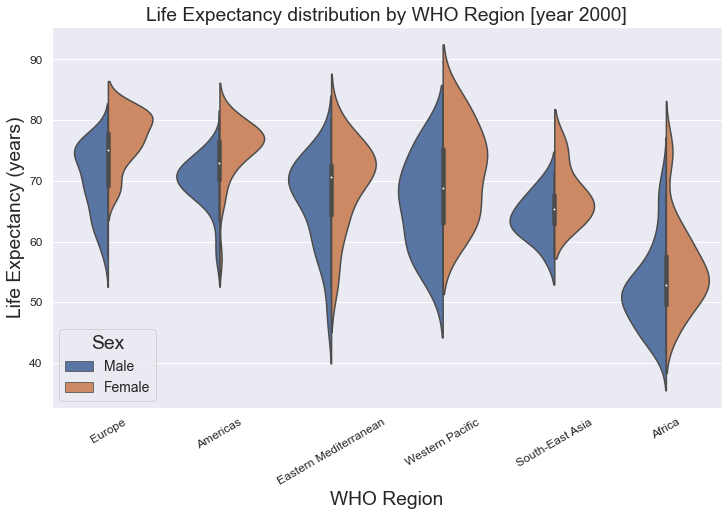

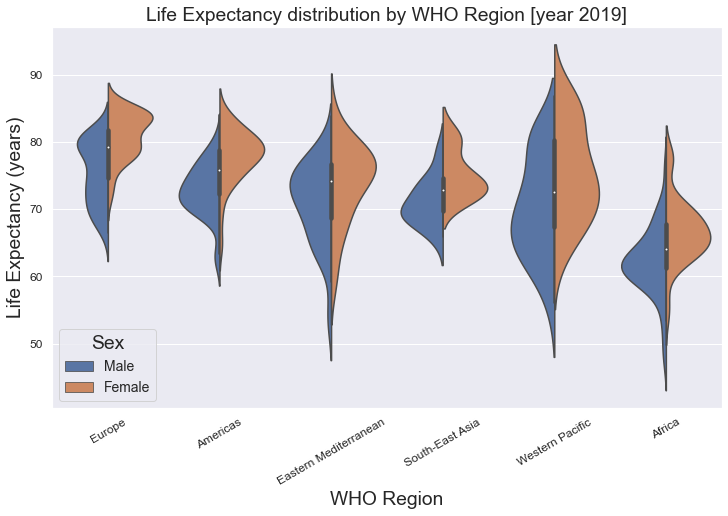

Life Expectancy median for each WHO Region
                        2000   2019  Increase
who_region                                   
Europe                 75.00  79.30      4.30
Americas               72.85  75.80      2.95
Eastern Mediterranean  70.65  74.15      3.50
Western Pacific        68.85  72.65      3.80
South-East Asia        65.35  72.85      7.50
Africa                 52.80  64.10     11.30


In [14]:
# Year 2000
life_expectancy_2000 = life_expectancy_2000[life_expectancy_2000.sex != "Both sexes"]
life_expectancy_2000 = life_expectancy_2000[life_expectancy_2000.who_region != "Global"]

life_expectancy_median_2000 = life_expectancy_2000.groupby(by=['who_region']).display_value.median().sort_values(ascending=False)

sns.set(font_scale = 1.6)
plt.figure(figsize=(12,7))
le_order_2000_index = life_expectancy_median_2000.index
violin = sns.violinplot(data=life_expectancy_2000, x="who_region", y="display_value", order=le_order_2000_index, hue="sex", split=True)
plot_title= 'Life Expectancy distribution by WHO Region [year 2000]'
violin.set(xlabel='WHO Region', ylabel='Life Expectancy (years)', title=plot_title)
plt.legend(title='Sex', loc='lower left', fontsize=14)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Year 2019
life_expectancy_2019 = life_expectancy_2019[life_expectancy_2019.sex != "Both sexes"]
life_expectancy_2019 = life_expectancy_2019[life_expectancy_2019.who_region != "Global"]

life_expectancy_median_2019 = life_expectancy_2019.groupby(by=['who_region']).display_value.median().sort_values(ascending=False)

sns.set(font_scale = 1.6)
plt.figure(figsize=(12,7))
le_order_2019_index = life_expectancy_median_2019.index
violin = sns.violinplot(data=life_expectancy_2019, x="who_region", y="display_value", order=le_order_2019_index, hue="sex", split=True)
plot_title= 'Life Expectancy distribution by WHO Region [year 2019]'
violin.set(xlabel='WHO Region', ylabel='Life Expectancy (years)', title=plot_title)
plt.legend(title='Sex', loc='lower left', fontsize=14)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


life_expectancy_median = pd.DataFrame(columns=['2000','2019','Increase'])
life_expectancy_median['2000'] = life_expectancy_median_2000
life_expectancy_median['2019'] = life_expectancy_median_2019
life_expectancy_median['Increase'] = life_expectancy_median_2019 - life_expectancy_median_2000

print('Life Expectancy median for each WHO Region')
print(life_expectancy_median)



**Current data provides some insights:**

1. Life expectancy MEDIAN has **increased** in ALL regions since year 2000
2. Life expectancy VARIANCE has **descreaded** since year 2000 specially in developing regions (SEA, WP, and Africa)
3. Western pacific is the region with a wider LE distribution. Having the country with highest LE and some of the countries with lower LE.
4. Africa shows the **biggest increase** in LE median since year 2000
5. <u>In every region of the world women show a higher LE than men</u>

We'll further explore the sexual difference in LE in the following section.

## Male vs Female expectancies across countries

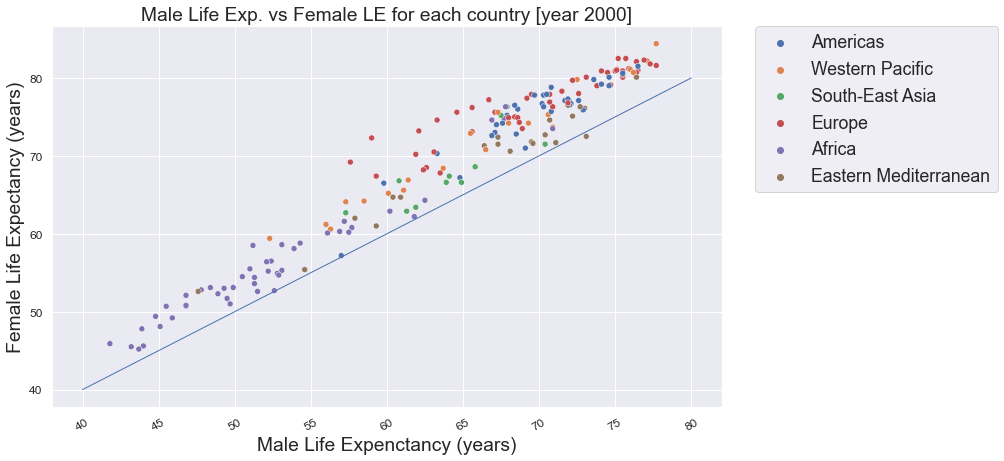

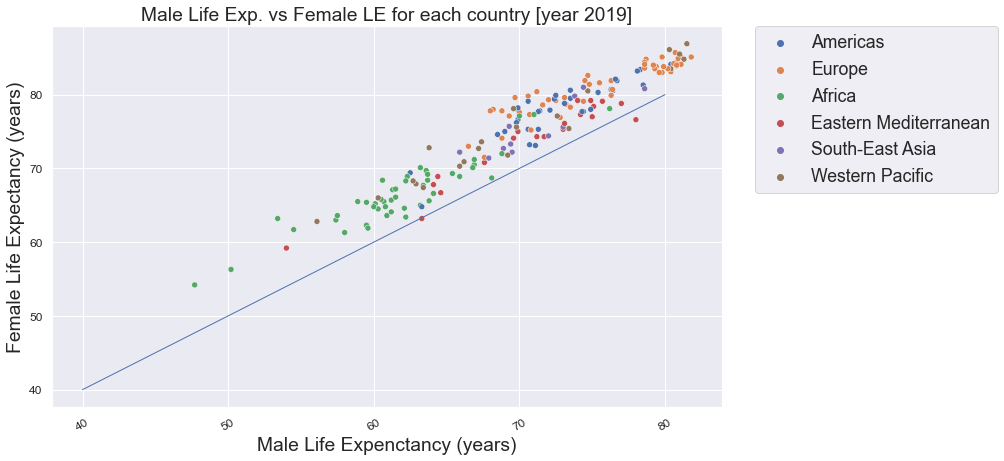

In [17]:
sns.set(font_scale = 1.6)
plt.figure(figsize=(12,7))

male_expectancy_2000 = life_expectancy_2000[(life_expectancy_2000.sex == "Male")]
female_expectancy_2000 = life_expectancy_2000[(life_expectancy_2000.sex == "Female")]
merged_expectancy_2000 = male_expectancy_2000.merge(right=female_expectancy_2000, on='country', how='left')
merged_expectancy_2000 = merged_expectancy_2000.dropna(axis=0, subset=['who_region_x','country','display_value_x','display_value_y'])

scatter = sns.scatterplot(data=merged_expectancy_2000, x='display_value_x', y='display_value_y', hue='who_region_x')
plot_title= 'Male Life Exp. vs Female LE for each country [year 2000]'
scatter.set(xlabel='Male Life Expectancy (years)', ylabel='Female Life Expectancy (years)', title=plot_title)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
line = np.linspace(40, 80, 100)
plt.plot(line, line, linewidth=1)
plt.show()

sns.set(font_scale = 1.6)
plt.figure(figsize=(12,7))

male_expectancy_2019 = life_expectancy_2019[(life_expectancy_2019.sex == "Male")]
female_expectancy_2019 = life_expectancy_2019[(life_expectancy_2019.sex == "Female")]
merged_expectancy_2019 = male_expectancy_2019.merge(right=female_expectancy_2019, on='country', how='left')
merged_expectancy_2019 = merged_expectancy_2019.dropna(axis=0, subset=['who_region_x','country','display_value_x','display_value_y'])

scatter = sns.scatterplot(data=merged_expectancy_2019, x='display_value_x', y='display_value_y', hue='who_region_x')
plot_title= 'Male Life Exp. vs Female LE for each country [year 2019]'
scatter.set(xlabel='Male Life Expectancy (years)', ylabel='Female Life Expectancy (years)', title=plot_title)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
line = np.linspace(40, 80, 100)
plt.plot(line, line, linewidth=1)
plt.show()




The blue line represents the identity between male and female LE.

**This plot shows graphically that female LE is higher than male LE for (almost) every country in the world.**  

Also, it makes evident how LE has increased since year 2000.

## Including GDP data per country

In [70]:
GDP = pd.read_csv('GDP_per_capita.csv')
GDP.head(15)

,Country Name,Country Code,2000,2010,2015,2019
0,Aruba,ABW,20614.799350,24134.473860,28399.050130,31135.884360
1,Africa Eastern and Southern,AFE,713.177900,1659.654922,1556.316469,1511.309259
2,Afghanistan,AFG,NaN,543.306526,556.007221,494.179350
3,Africa Western and Central,AFW,525.458896,1687.588526,1894.322115,1777.852822
4,Angola,AGO,556.836182,3497.974488,3127.890598,2177.799015
5,Albania,ALB,1126.683340,4094.348386,3952.802538,5396.215864
6,Andorra,AND,21854.246800,40849.761280,35770.918650,40898.417910
7,Arab World,ARB,2890.169220,6556.987974,6359.900578,6562.969998
8,United Arab Emirates,ARE,33291.366250,33893.277250,38663.388260,42701.443050
9,Argentina,ARG,7708.099115,10385.964430,13789.060420,10076.355240


In [80]:
GDP.drop_duplicates()
GDP.columns = map(str.lower, GDP.columns)
GDP.columns = GDP.columns.str.replace(' ','_')
GDP = GDP.rename(columns={'country_name': 'country'})
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       266 non-null    object 
 1   country_code  266 non-null    object 
 2   2000          247 non-null    float64
 3   2010          256 non-null    float64
 4   2015          258 non-null    float64
 5   2019          255 non-null    float64
dtypes: float64(4), object(2)
memory usage: 12.6+ KB


## Life Expectancy Difference between men and women by country GDP

In [85]:

life_expectancy_only_countries = life_expectancy[life_expectancy.who_region != "Global"]
life_expectancy_only_countries_bysex = life_expectancy_only_countries[life_expectancy_only_countries.sex != "Both sexes"]
life_expectancy_only_countries_bysex_2019 = life_expectancy_only_countries_bysex[life_expectancy_only_countries_bysex.year == 2019]
le_2019_male = life_expectancy_only_countries_bysex_2019[life_expectancy_only_countries_bysex_2019.sex == 'Male']
le_2019_female = life_expectancy_only_countries_bysex_2019[life_expectancy_only_countries_bysex_2019.sex == 'Female']

le_2019 = pd.merge(le_2019_male,le_2019_female, on='country')
le_2019['diff'] = le_2019.display_value_y - le_2019.display_value_x

GDP = GDP.rename(columns={'country_name':'country'})
le_gdp_2019= pd.merge(le_2019[['who_region_x','country','diff']], GDP[['country','2019']], on='country', how='left' )

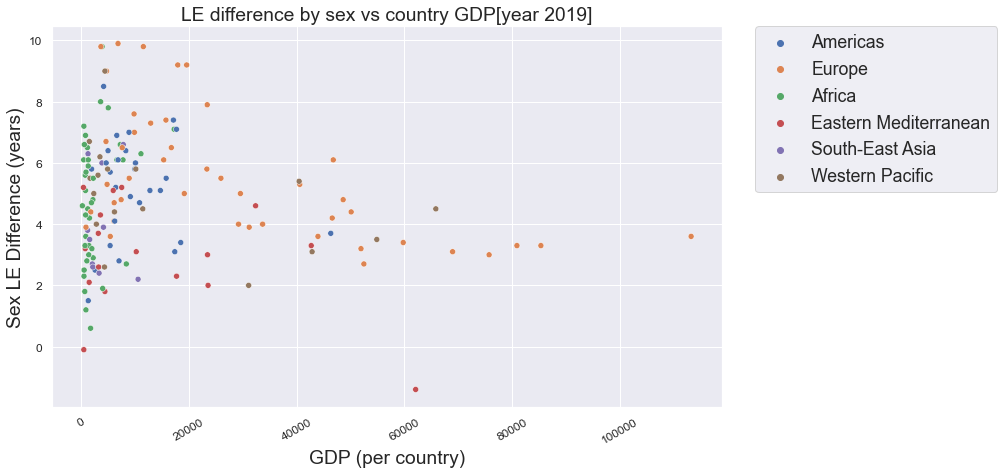

In [88]:
sns.set(font_scale = 1.6)
plt.figure(figsize=(12,7))


scatter = sns.scatterplot(data=le_gdp_2019, x='2019', y='diff', hue='who_region_x')
plot_title= 'LE difference by sex vs country GDP [year 2019]'
scatter.set(xlabel='GDP (per country)', ylabel='Sex LE Difference (years)', title=plot_title)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**So far we can observe the following:**

1. Seems that <u>as GDP grows, variablity in life expectancy difference between mean and women dicreases </u>.
2. Some of the country with the <u>highest difference in LE by sexes are radicated in Europe</u>.